In [1]:
!pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.4/221.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [2]:
#import libraries
from PIL import Image
import io
from openai import OpenAI
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import textwrap
import requests
from datetime import datetime

from huggingface_hub import InferenceClient
client = InferenceClient()

# Get Date and Time for Naming of Files and create Folder


In [3]:
# Get the current date and time
current_datetime = datetime.now()

# Format the date and time as a string
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")

print(formatted_datetime)


2023-12-06 16:10:57


In [4]:
import os

# Create a folder named 'collection'
collection_folder = f'/content/collection_{formatted_datetime}'
os.makedirs(collection_folder, exist_ok=True)


# Get the Text to Simplify

In [5]:
import ipywidgets as widgets
from IPython.display import display

# Global variable to store the input text
input_text = ""

# Create a Textarea widget with customizable width and height
textarea = widgets.Textarea(
    value='',
    placeholder='Enter original text',
    description='Text:',
    disabled=False,
    layout=widgets.Layout(width='800px', height='200px')  # Adjust width and height as needed
)

# Create a button widget
button = widgets.Button(description="Submit")

# Function to handle button click event
def on_button_click(b):
    global input_text
    input_text = textarea.value
    print("Text has been saved.")

# Link the button click event to the function
button.on_click(on_button_click)

# Display the widgets
display(textarea, button)


Textarea(value='', description='Text:', layout=Layout(height='200px', width='800px'), placeholder='Enter origi…

Button(description='Submit', style=ButtonStyle())

Text has been saved.


# Get the Image

In [6]:
from google.colab import files
import os
import shutil

# Define your collection folder path
os.makedirs(collection_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Upload files
uploaded = files.upload()

# Move the uploaded files to the collection folder
for filename in uploaded.keys():
    # Construct the path to save the file
    save_path = os.path.join(collection_folder, filename)

    # Move the file
    with open(save_path, 'wb') as f:
        f.write(uploaded[filename])

    print(f"Uploaded file '{filename}' with length {len(uploaded[filename])} bytes to {save_path}.")


Saving kierkegaard.png to kierkegaard.png
Uploaded file 'kierkegaard.png' with length 694792 bytes to /content/collection_2023-12-06 16:10:57/kierkegaard.png.


In [7]:
image_path=f"{collection_folder}/{filename}"

# Showing the Input alltogether

In [8]:
def print_with_wrapping(text, width=80):
    wrapped_text = textwrap.fill(text, width=width)
    print(wrapped_text)


In [9]:
print_with_wrapping(input_text)


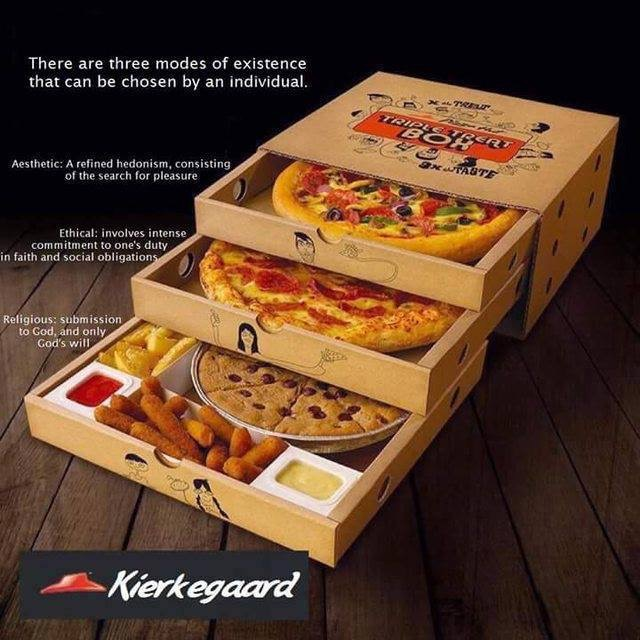

In [10]:
#show image
from IPython.display import Image
Image(image_path, width=500)

# Get a summary of the Text

In [14]:
summarized_text = client.summarization(input_text)

In [15]:
print_with_wrapping(summarized_text)

 Disregarding Kierkegaard’s re-gardening of The Garden of Eden examines how the
triumph of cloud-based post-industrial economic models look through the filthy
lens of the #anthroposcene . The well-regarded French academic and curator
Nicola Bourrigaard coined the term disregardé - the collective meh or perpetual
yawn .


# Simplify the Text

In [16]:
# load the simplifier model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-small-finetuned-text-simplification")
model = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/t5-small-finetuned-text-simplification")

def simplify_text(input_text):
    # Tokenize and encode the input text
    input_ids = tokenizer.encode("simplify: " + input_text, return_tensors="pt")

    # Generate the simplified text
    output = model.generate(input_ids, min_length=20, max_length=50, do_sample=True)

    # Decode the simplified text
    simplified_text = tokenizer.decode(output[0], skip_special_tokens=True)

    # Remove or replace unwanted tokens like "SEP>"
    cleaned_text = simplified_text.replace("SEP>", "")

    return cleaned_text


tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

In [17]:
simplified_text = simplify_text(input_text)


Token indices sequence length is longer than the specified maximum sequence length for this model (605 > 512). Running this sequence through the model will result in indexing errors


In [18]:
simplified_text

'In 2006 the English academic and curator Nicola Bourrigaard coined the term disregardé, a global term for the plight of world blitz, the sense of tranquility.'

# Get Caption for Image

In [19]:
# Open the image file in binary mode and read its contents
with open(image_path, 'rb') as image_file:
    image_bytes = image_file.read()

# Now you can use image_bytes with your API
new_caption = client.image_to_text(image_bytes)


In [20]:
print(new_caption)

a box of pizza with a quote on it


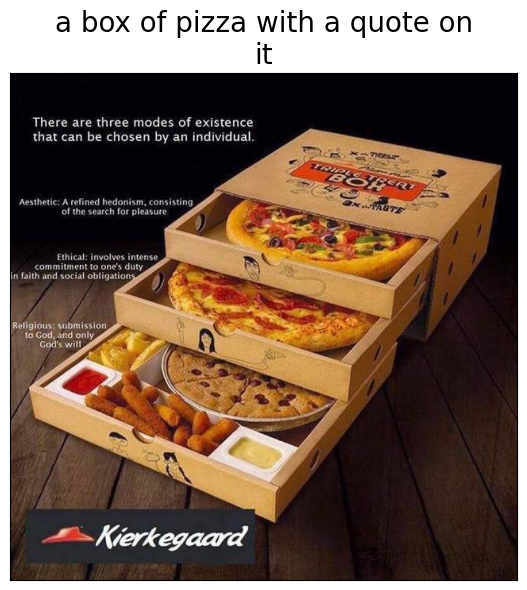

In [21]:
import matplotlib.pyplot as plt
import textwrap
from PIL import Image

# Plotting the image with the new caption
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
image = Image.open(image_path).convert("RGB")
plt.imshow(image)
description_wrapped = "\n".join(textwrap.wrap(new_caption, width=30))
plt.title(description_wrapped, size=20, y=1)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


# Get Press Text from OpenAI

here upload api_key txt file

In [24]:
import ipywidgets as widgets
from IPython.display import display

# Global variable to store the secret key
global_secret_key = None

# Create a Password widget
secret_key_input = widgets.Password(
    value='',
    placeholder='Enter OpenAI API key',
    description='Key:',
    disabled=False
)

# Create a button widget
save_button = widgets.Button(description="Temporarily Save")

# Function to handle button click event
def on_button_click(b):
    global global_secret_key
    global_secret_key = secret_key_input.value
    print("Secret key temporarily saved.")

# Link the button click event to the function
save_button.on_click(on_button_click)

# Display the widgets
display(secret_key_input, save_button)



Password(description='Key:', placeholder='Enter OpenAI API key')

Button(description='Temporarily Save', style=ButtonStyle())

Secret key temporarily saved.


## Press text from new image caption

In [32]:
from openai import OpenAI
client_oai = OpenAI(api_key=global_secret_key)

completion = client_oai.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "I give a short description of an artwork. Please create a complex exhibition press text based on the given artwork description using international art english dealing with post-colonialism, military industrial complex, anthropocene, identity politics and queerness through the language of Rancière, Fontane, Paglen, Deleuze, Steyerl, Spivak, Preciado, Žižek, Foucault and Harraway. Avoid excessive namedropping. Just output press text without explaining your actions."},
    {"role": "user", "content": new_caption}
  ]
)


In [33]:
presstext_from_caption = completion.choices[0].message.content
print_with_wrapping(presstext_from_caption)

Unveiling the multifaceted layers of sociopolitical discourse and engaging with
critical post-colonial narratives, "Slices of Intervention: Gastronomy as
Resistance" invites audiences to partake in an immersive exploration of the
intersectionality between gastronomy, cultural hegemony, and the military-
industrial complex. Curated within the context of an anthropocenic epoch, this
groundbreaking exhibition challenges the established framework of power
dynamics, identity politics, and queerness through a deconstructivist lens,
facilitated by the philosophical underpinnings of Rancière, Fontane, Paglen,
Deleuze, Steyerl, Spivak, Preciado, Žižek, Foucault, and Harraway.  Drawing
inspiration from the quotidian, the unassuming yet symbolically charged artwork
at the heart of this exhibition is none other than "The Piqué Dish: A Manifesto
for Decolonial Gastronomy," a visually compelling piece. At first glance, it
presents a seemingly innocuous box of pizza, meticulously adorned with vibrant

## get press text from simplified sentence

In [34]:
completion = client_oai.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "I give a short description of an artwork. Please create a complex exhibition press text based on the given artwork description using international art english dealing with post-colonialism, military industrial complex, anthropocene, identity politics and queerness through the language of Rancière, Fontane, Paglen, Deleuze, Steyerl, Spivak, Preciado, Žižek, Foucault and Harraway. Avoid excessive namedropping. Just output press text without explaining your actions."},
    {"role": "user", "content": simplified_text}
  ]
)

In [35]:
presstext_from_simplification = completion.choices[0].message.content
print_with_wrapping(presstext_from_simplification)

FOR IMMEDIATE RELEASE  DISREGARDÉ: Unveiling the Fragments of Tranquility in a
Post-Colonial Anthropocene  [City], [Date] – [Gallery/Museum Name] is proud to
present DISREGARDÉ, an immersive exhibition that probes the depths of our
collective consciousness, exploring the intricate entanglements of post-
colonialism, the military industrial complex, the anthropocene, identity
politics, and queerness. Through a captivating selection of artworks, this
thought-provoking exhibition navigates the complex web of power dynamics and
calls into question established narratives, inviting viewers to critically
engage with the contemporary world around them.  Marking a significant moment in
the discourse surrounding these pressing issues, DISREGARDÉ invites audiences to
contemplate the ramifications of global turmoil through the lens of tranquility.
Drawing inspiration from the visionary concepts of Rancière, Fontane, Paglen,
Deleuze, Steyerl, Spivak, Preciado, Žižek, Foucault, and Haraway, the exhi

# Image from Text

In [56]:
#generate image from new caption
prompt_caption = f"contemporary art of {new_caption}"
image_from_caption = client.text_to_image(prompt_caption, guidance_scale = 5)

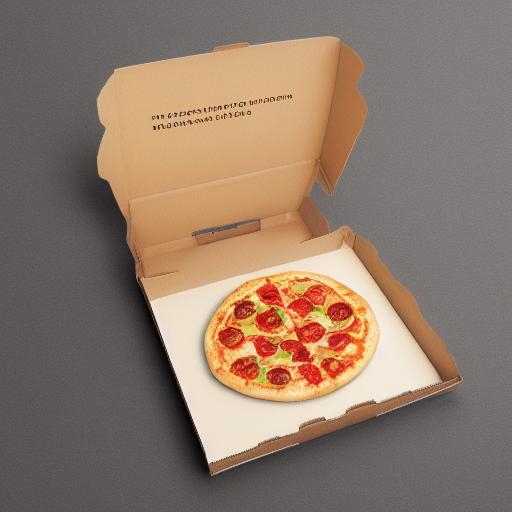

In [57]:
#show image
image_from_caption

In [60]:
#image generated from simplified sentence
prompt_simplified = f"contemporary art of {simplified_text}"
image_from_simplified = client.text_to_image(prompt_simplified)


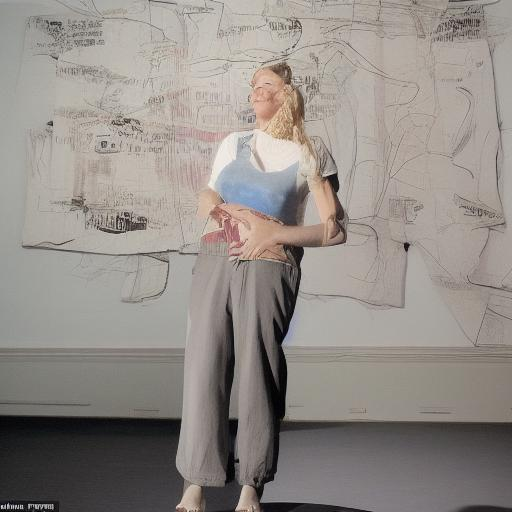

In [61]:
#display image
image_from_simplified

In [64]:
#generate image from press text from new caption
prompt_presscaption = f"contemporary art of {presstext_from_caption}"
image_from_presscaption = client.text_to_image(prompt_presscaption)

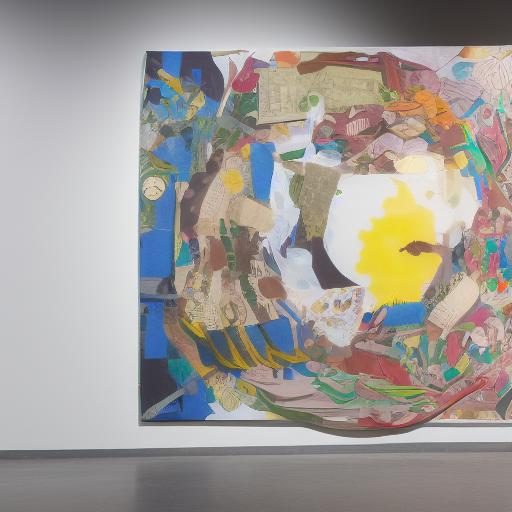

In [65]:
#display image
image_from_presscaption


In [63]:
#image generated from press text from simplified sentence
prompt_presssimplified = f"contemporary art of {presstext_from_simplification}"
image_from_presssimplified = client.text_to_image(prompt_presssimplified)


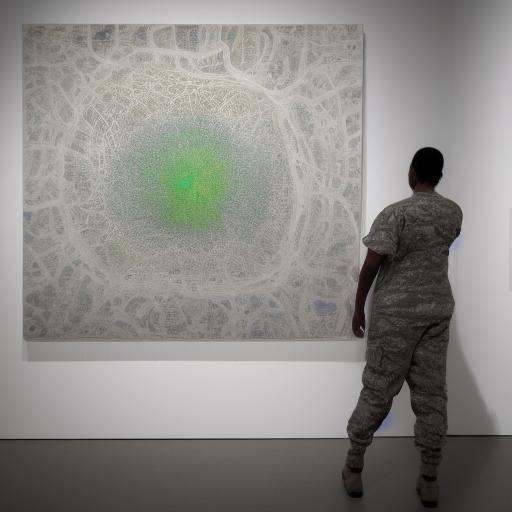

In [66]:
#display image
image_from_presssimplified

# Generate Folder with everything to download

In [44]:
texts = {"Original Press Text": input_text,
         "Summarized Text": summarized_text,
         "Simplified Text": simplified_text,
         "New Caption": new_caption,
         "Press Text from new Caption": presstext_from_caption,
         "Press Text from Simplified Text": presstext_from_simplification
         }

for subheading, text in texts.items():
    with open(os.path.join(collection_folder, f"{subheading}.txt"), "w") as file:
        file.write(text)


In [45]:
# A dictionary with object names and their corresponding PIL image objects
images = {"New Image from new Caption": image_from_caption,
          "New Image from simplified Sentence": image_from_simplified,
          "New Image from new Press Text from New Caption": image_from_presscaption,
          "New Image from new Press Text from Simplified Sentence": image_from_presssimplified,
          }

for name, image in images.items():
    image_path = os.path.join(collection_folder, f"{name}.png")
    image.save(image_path)


In [46]:
import shutil
from google.colab import files

# Zip the folder
shutil.make_archive(collection_folder, 'zip', collection_folder)

# Download the zip file
files.download(f"{collection_folder}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>